In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
!curl -o loki.jpg https://wallpapercosmos.com/w/full/7/4/4/184842-3840x2160-desktop-4k-loki-background-photo.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3132k  100 3132k    0     0  1081k      0  0:00:02  0:00:02 --:--:-- 1080k   0     0   538k      0  0:00:05  0:00:01  0:00:04  538k


In [6]:
image = cv2.imread('loki.jpg',0)

In [7]:
# Perform Fourier transform
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)

In [13]:
# Create ideal low-pass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
d = 30  # Cutoff frequency
low_pass_mask = np.zeros((rows, cols), np.uint8)
cv2.circle(low_pass_mask, (ccol, crow), d, (1), -1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
# Apply the low-pass filter
f_shift_low_pass = f_shift * low_pass_mask

In [15]:
# Perform inverse Fourier transform to get the image back
f_ishift_low_pass = np.fft.ifftshift(f_shift_low_pass)
img_back_low_pass = np.fft.ifft2(f_ishift_low_pass)
img_back_low_pass = np.abs(img_back_low_pass)

In [16]:
# Create ideal high-pass filter
high_pass_mask = np.ones((rows, cols), np.uint8) - low_pass_mask

In [17]:
# Apply the high-pass filter
f_shift_high_pass = f_shift * high_pass_mask

In [18]:
# Perform inverse Fourier transform to get the image back
f_ishift_high_pass = np.fft.ifftshift(f_shift_high_pass)
img_back_high_pass = np.fft.ifft2(f_ishift_high_pass)
img_back_high_pass = np.abs(img_back_high_pass)

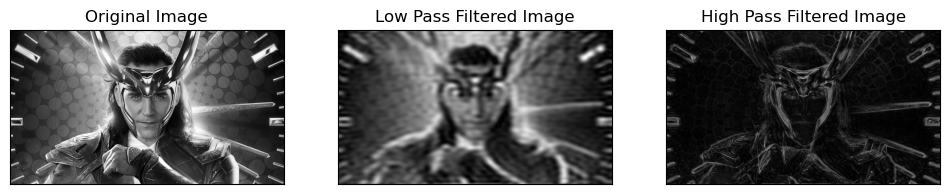

In [19]:
# Display the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_back_low_pass, cmap='gray')
plt.title('Low Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back_high_pass, cmap='gray')
plt.title('High Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()